In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:

!pip install seaborn --quiet

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:

df = pd.read_csv("/content/lifestyle_sustainability_data.csv")
df.head()


,ParticipantID,Age,Location,DietType,LocalFoodFrequency,TransportationMode,EnergySource,HomeType,HomeSize,ClothingFrequency,SustainableBrands,EnvironmentalAwareness,CommunityInvolvement,MonthlyElectricityConsumption,MonthlyWaterConsumption,Gender,UsingPlasticProducts,DisposalMethods,PhysicalActivities,Rating
0,1,35,Urban,Mostly Plant-Based,Often,Bike,Renewable,Apartment,800,Rarely,True,5,High,100,1500,Female,Rarely,Composting,High,5
1,2,28,Suburban,Balanced,Sometimes,Public Transit,Mixed,House,1500,Sometimes,True,4,Moderate,250,3000,Male,Sometimes,Recycling,Moderate,4
2,3,65,Rural,Mostly Animal-Based,Rarely,Car,Non-Renewable,House,2500,Often,False,2,Low,400,4500,Male,Often,Landfill,Low,1
3,4,42,Urban,Mostly Plant-Based,Often,Walk,Renewable,Apartment,950,Sometimes,True,4,Moderate,150,2000,Female,Rarely,Recycling,High,5
4,5,31,Suburban,Balanced,Sometimes,Public Transit,Mixed,House,1800,Often,True,3,Low,300,3500,Non-Binary,Sometimes,Combination,Moderate,3


In [4]:
print("Structure:\n", df.info())
print("\nMissing Values:\n", df.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 499 entries, 0 to 498
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   ParticipantID                  499 non-null    int64 
 1   Age                            499 non-null    int64 
 2   Location                       499 non-null    object
 3   DietType                       499 non-null    object
 4   LocalFoodFrequency             499 non-null    object
 5   TransportationMode             499 non-null    object
 6   EnergySource                   499 non-null    object
 7   HomeType                       499 non-null    object
 8   HomeSize                       499 non-null    int64 
 9   ClothingFrequency              499 non-null    object
 10  SustainableBrands              499 non-null    bool  
 11  EnvironmentalAwareness         499 non-null    int64 
 12  CommunityInvolvement           381 non-null    object
 13  Month

<ipython-input-8-7de536a621be>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='Age', y='MonthlyElectricityConsumption', palette='YlGn')


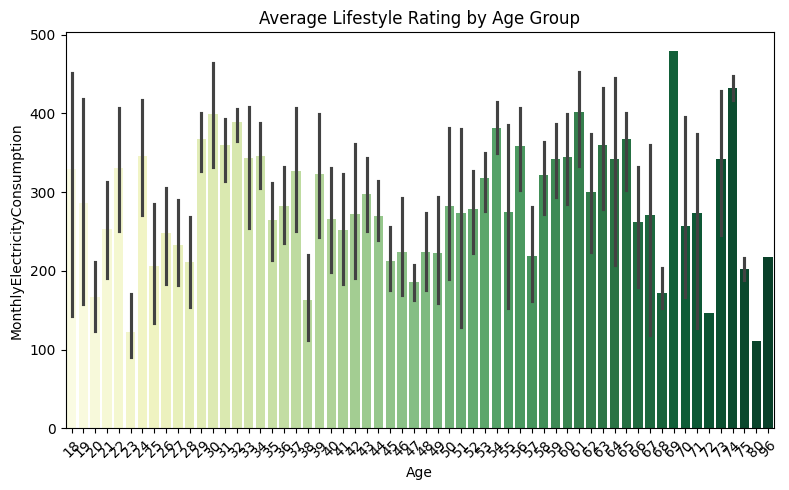

In [8]:


if 'Age' in df.columns and 'MonthlyElectricityConsumption' in df.columns:
    plt.figure(figsize=(8, 5))
    sns.barplot(data=df, x='Age', y='MonthlyElectricityConsumption', palette='YlGn')
    plt.title("Average Lifestyle Rating by Age Group")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
else:
    print("Columns 'Age' and 'MonthlyElectricityConsumption' not found in dataset.")

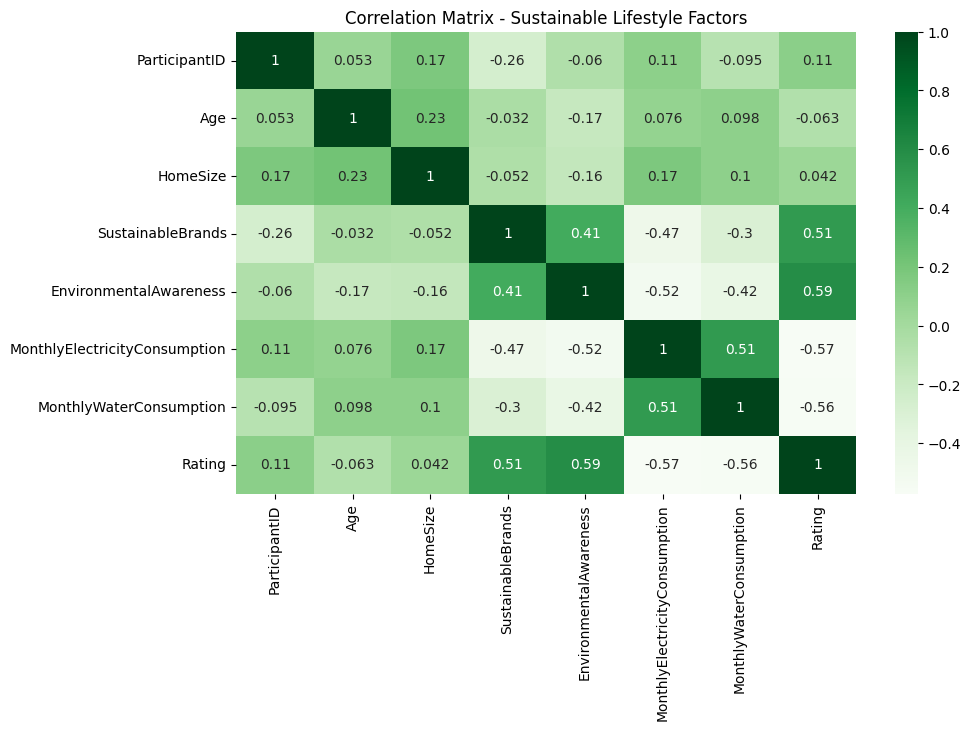

In [9]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='Greens')
plt.title("Correlation Matrix - Sustainable Lifestyle Factors")
plt.show()
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns

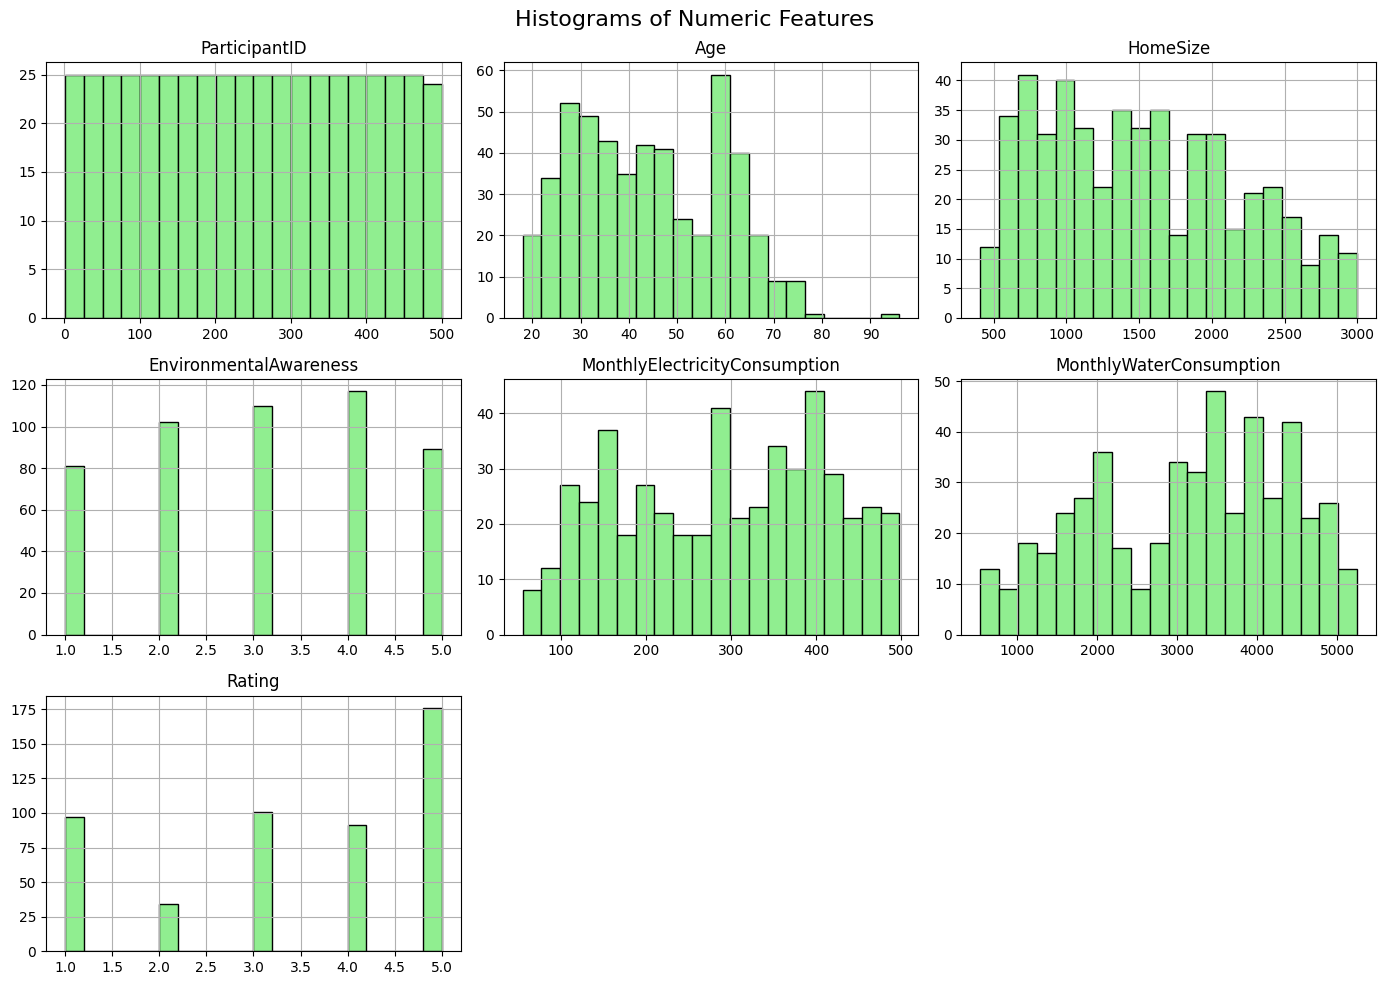

In [10]:
df[numeric_cols].hist(bins=20, figsize=(14, 10), color='lightgreen', edgecolor='black')
plt.suptitle("Histograms of Numeric Features", fontsize=16)
plt.tight_layout()
plt.show()

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.preprocessing import LabelEncoder
# Make a copy to keep original safe
data = df.copy()

# Drop rows with missing values (optional: you can also impute)
data = data.dropna()

# Encode categorical variables
label_encoders = {}
categorical_cols = data.select_dtypes(include=['object']).columns

for col in categorical_cols:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le

# Ensure target exists
target = 'HomeSize'  # change to lowercase if you cleaned columns
if target not in data.columns:
    raise ValueError("Target column 'Lifestyle_Rating' not found!")

# Features = all columns except target
X = data.drop(columns=[target])
y = data[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))
print("R2 Score:", r2_score(y_test, y_pred))

print("Predictions:", model.predict(X_test.head()))


Mean Absolute Error: 282.10941176470595
R2 Score: 0.40780559664110294
Predictions: [1924.7  1200.5  1721.81  995.49 1754.5 ]
